# _*TALLER INTELIGENCIA DE NEGOCIOS*_ (Clustering con K-Means)
## _Integrantes_
- Diego Olmedo
- Nicolas Wilches
- Mariana Chacon
- Juan Mateus

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/juanpablo130502/TallerDatasetTitanic_BI/refs/heads/main/Data/dataset_kmeans_19022025.csv"
df = pd.read_csv(url, delimiter=";")
print(df.head(5))

   Edad  Gasto Mensual (USD)  Compras Mensuales
0    56                  714                 24
1    69                  115                  3
2    46                  698                 13
3    32                  653                  7
4    60                  486                 25


## Analisis Exporatorio de Datos (AED)

In [4]:
df.describe()

,Edad,Gasto Mensual (USD),Compras Mensuales
count,10000.000000,10000.000000,10000.00000
mean,44.021700,528.553900,15.40700
std,15.203998,275.265567,8.60825
min,18.000000,50.000000,1.00000
25%,31.000000,291.000000,8.00000
50%,44.000000,530.000000,15.00000
75%,57.000000,767.000000,23.00000
max,70.000000,1000.000000,30.00000


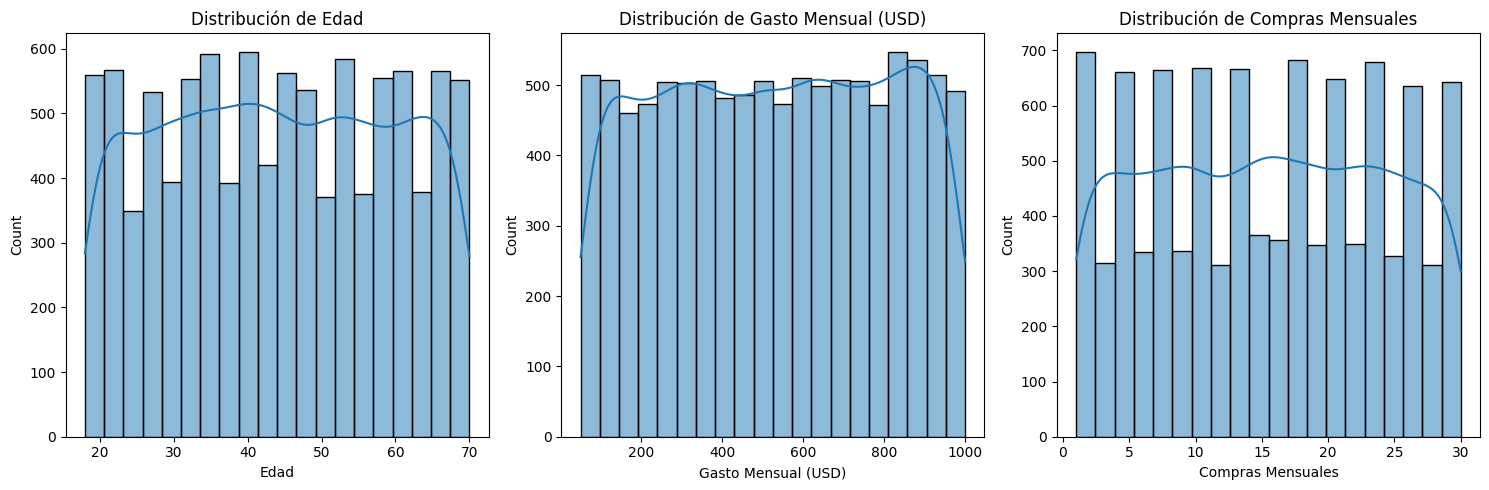

In [5]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(df.columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

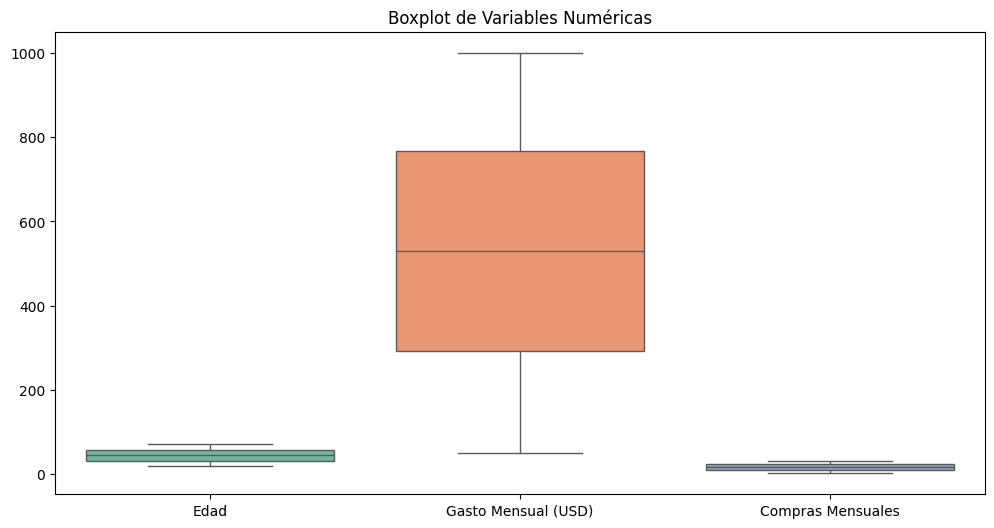

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="Set2")
plt.title("Boxplot de Variables Numéricas")
plt.show()

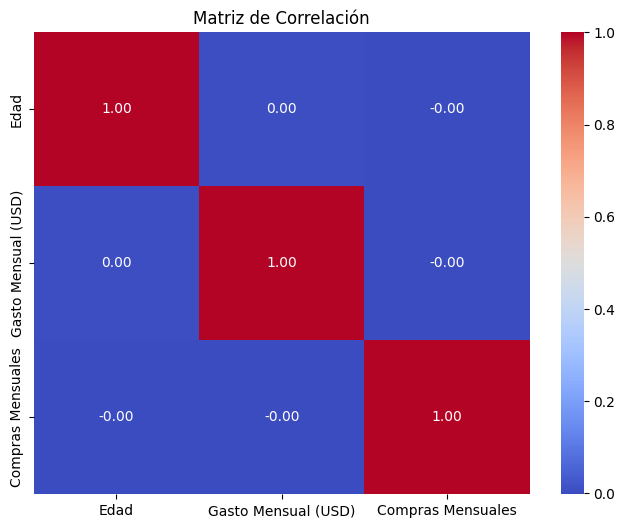

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

## Aplicación del algoritmo K-Means

In [8]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

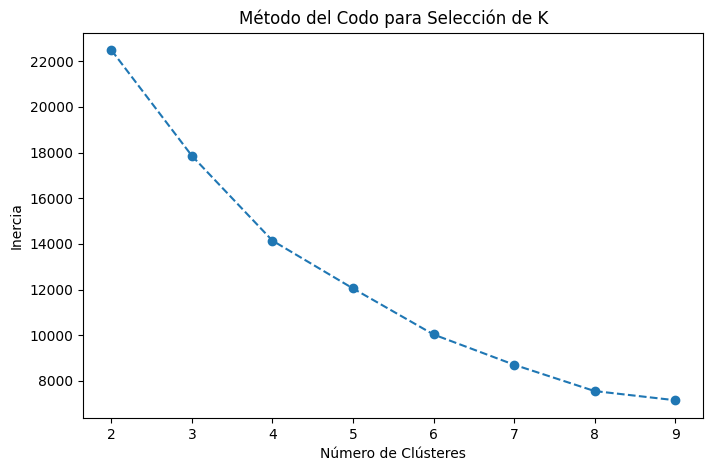

In [9]:
inertia = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.title('Método del Codo para Selección de K')
plt.show()

In [10]:
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f'K={k}, Silhouette Score={score:.4f}')

K=2, Silhouette Score=0.2442
K=3, Silhouette Score=0.2415
K=4, Silhouette Score=0.2763
K=5, Silhouette Score=0.2639
K=6, Silhouette Score=0.2824
K=7, Silhouette Score=0.2770
K=8, Silhouette Score=0.2766
K=9, Silhouette Score=0.2677


In [11]:
k = 4  
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)
df.head()

,Edad,Gasto Mensual (USD),Compras Mensuales,Cluster
0,56,714,24,1
1,69,115,3,0
2,46,698,13,0
3,32,653,7,2
4,60,486,25,1


## Analisis de resultados del Clustering

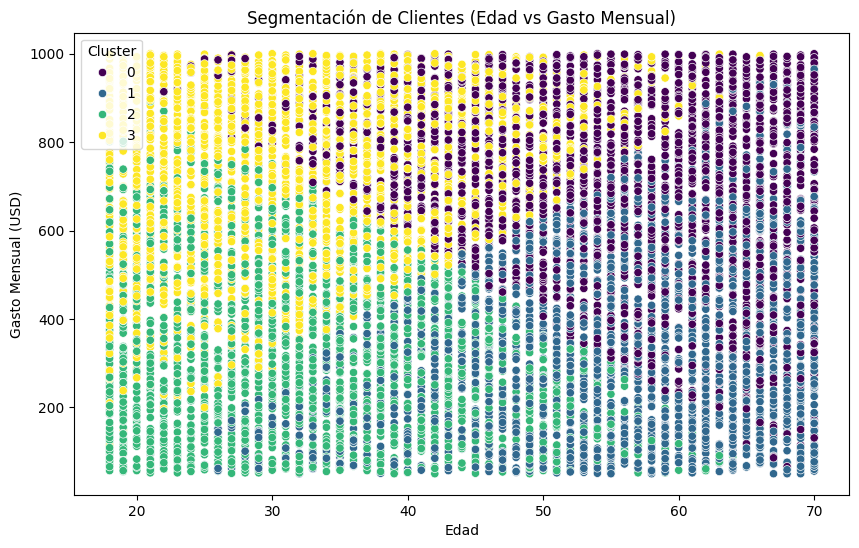

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Edad', y='Gasto Mensual (USD)', hue='Cluster', palette='viridis')
plt.title('Segmentación de Clientes (Edad vs Gasto Mensual)')
plt.show()

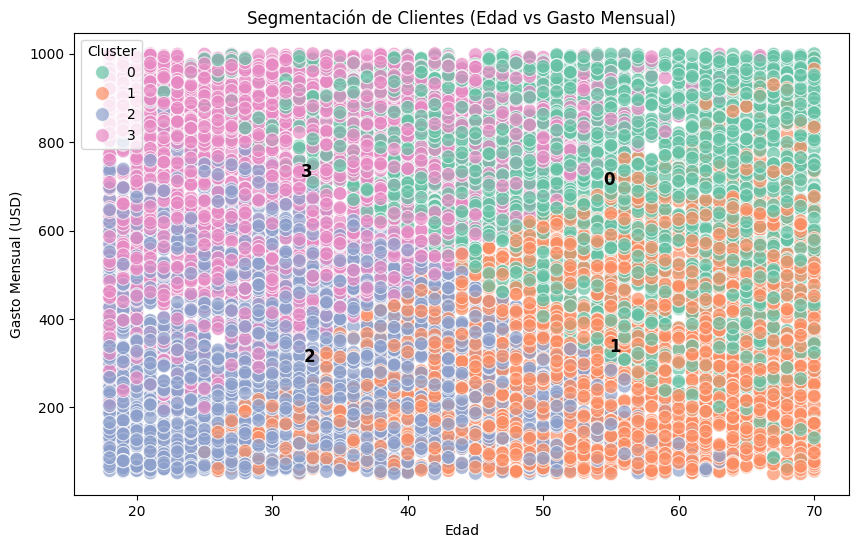

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Edad', y='Gasto Mensual (USD)', hue='Cluster', palette='Set2', s=100, alpha=0.7)

for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.text(cluster_data['Edad'].mean(), cluster_data['Gasto Mensual (USD)'].mean(), str(cluster), 
             fontsize=12, color='black', ha='center', va='center', fontweight='bold')

plt.title('Segmentación de Clientes (Edad vs Gasto Mensual)')
plt.legend(title='Cluster')
plt.show()

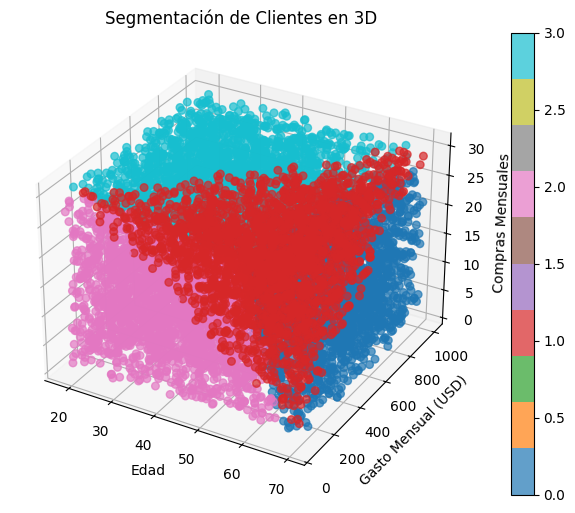

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['Edad'], df['Gasto Mensual (USD)'], df['Compras Mensuales'], 
                c=df['Cluster'], cmap='tab10', s=30, alpha=0.7)

ax.set_xlabel('Edad')
ax.set_ylabel('Gasto Mensual (USD)')
ax.set_zlabel('Compras Mensuales')
ax.set_title('Segmentación de Clientes en 3D')
plt.colorbar(sc)
plt.show()

In [15]:
df[df['Edad'] > 50]['Cluster'].value_counts()

Cluster
0    1777
1    1694
2     148
3     144
Name: count, dtype: int64

In [16]:
df[df['Edad'] < 30]['Cluster'].value_counts()

Cluster
3    1093
2    1044
0      36
1      30
Name: count, dtype: int64

C:\Users\nicol\AppData\Local\Temp\ipykernel_24032\2393896300.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Edad', palette='viridis')


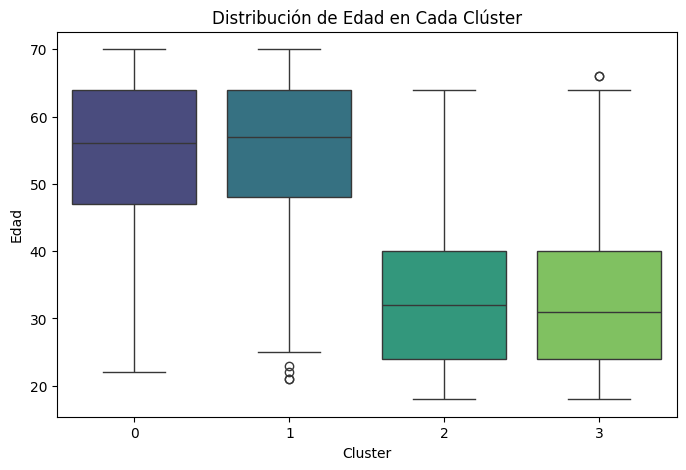

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Cluster', y='Edad', palette='viridis')
plt.title('Distribución de Edad en Cada Clúster')
plt.show()


In [18]:
df.groupby('Cluster').mean()

,Edad,Gasto Mensual (USD),Compras Mensuales
Cluster,,,
0,54.839190,713.774637,9.031322
1,55.265879,336.200326,22.070033
2,32.762295,315.287295,9.513934
3,32.572405,732.851167,21.322607


In [19]:
df.groupby('Cluster')['Edad'].median()

Cluster
0    56.0
1    57.0
2    32.0
3    31.0
Name: Edad, dtype: float64